# Task 1
QOSF screening task

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import RXGate, RZGate
from qiskit import Aer
from qiskit import execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import itertools

from qiskit_textbook.tools import array_to_latex


In [267]:
def error_single(qc,qubit,pid=0.0,px=0.0,pz=0.0,code='None'):
    ''' 
     Args:
     pid, px, pz: Probability of each errors
     
    '''
    
    
        
    if code=='None':
        #print("Original_qubit")
        if px+pz+pid!=1.0:
            pid=1.0-(px+pz)
        gate_index=np.random.choice([0,1,2],p=[pid,px,pz])
        if gate_index==0:
            print('Id',gate_index)
            qc.i(qubit) 
        if gate_index==1:
            print('x',gate_index)
            qc.x(qubit)

        if gate_index==2:
            print('z',gate_index)
            qc.z(qubit)


    if code=='cd_anc':
        #print("Bit_qubit0")
        if px+pz+pid!=1.0:
            pid=1.0-(px+pz)
        gate_index=np.random.choice([0,1,2],p=[pid,px,pz])
        if gate_index==0:
            print('Id',gate_index)
            qc.i(qcb[qubit]) 
        if gate_index==1:
            print('x',gate_index)
            qc.x(qcb[qubit]) 

        if gate_index==2:
            print('z',gate_index)
            qc.z(qcb[qubit]) 
            
    
    

    if code=='cd_anc1':
        #print("Bit_qubit1")
        if px+pz+pid!=1.0:
            pid=1.0-(px+pz)
        gate_index=np.random.choice([0,1,2],p=[pid,px,pz])
        if gate_index==0:
            print('Id',gate_index)
            qc.i(qcb1[qubit]) 
        if gate_index==1:
            print('x',gate_index)
            qc.x(qcb1[qubit]) 

        if gate_index==2:
            print('z',gate_index)
            qc.z(qcb1[qubit]) 

    if code=='cd_anc_out':
        #print("Out_qubit1")
        if px+pz+pid!=1.0:
            pid=1.0-(px+pz)
        gate_index=np.random.choice([0,1,2],p=[pid,px,pz])
        if gate_index==0:
            print('Id',gate_index)
            qc.i(qcb_out[qubit]) 
        if gate_index==1:
            print('x',gate_index)
            qc.x(qcb_out[qubit]) 

        if gate_index==2:
            print('z',gate_index)
            qc.z(qcb_out[qubit]) 


        

# Random error probabilities

In [299]:

perr_list=[0.1, 0.45, 0.45] 
# perr_list=[0.8, 0.1, 0.1] 


#''' perr_list=p[I], p[X], p[Z] '''

Both qubits can have random errors.
Asssumptions: We make sure that the encoder qubits + the original ones don't have more than 1 (1 in every 3 at max). 

In [300]:

def error_channel(qc, qubit0='Y', qubit1='Y'):
    ''' Randomly selects unitary error for both qubits
    '''

    if qubit0=='Y':
        # ########################################################
        error_single(qc,0, pid=perr_list[0], px=perr_list[1],\
                     pz=perr_list[2])


        perr_list1=perr_list
        perr_list1[0]=1.0-perr_list[2]
        perr_list1[1]=0.0
        #perr_list1[2]=perr_list[2]
        
        ###
        error_single(qc,0, pid=perr_list1[0], px=perr_list1[1],\
                     pz=perr_list1[2], code='cd_anc')


        error_single(qc,1, pid=perr_list1[0], px=perr_list1[1],\
                     pz=perr_list1[2], code='cd_anc')

        ###
        perr_list3=perr_list
        perr_list3[0]=1.0-perr_list[1]
        perr_list3[2]=0.0
        
        error_single(qc,0, pid=perr_list1[0], px=perr_list1[1],\
                    pz=perr_list1[2], code='cd_anc_out')


        error_single(qc,1, pid=perr_list1[0], px=perr_list1[1],\
                    pz=perr_list1[2], code='cd_anc_out')



    if qubit1=='Y':
        ########################################################
        error_single(qc,1, pid=perr_list[0], px=perr_list[1],\
                     pz=perr_list[2] )

        perr_list2=perr_list
        perr_list2[0]=1.0-perr_list[1]
        perr_list2[2]=0.0
        #perr_list2[1]=perr_list[1]

        
        ###
        error_single(qc,0, pid=perr_list2[0], px=perr_list2[1],\
                 pz=perr_list2[2],code='cd_anc1')

        error_single(qc,1, pid=perr_list2[0], px=perr_list2[1],\
                 pz=perr_list2[2], code='cd_anc1')
        ###
        ########################################################

In [301]:
def check_error0(qc, perr_list0=[1.0,0.0,0.0],perr_list1=[1.0,0.0,0.0],perr_list2=[1.0,0.0,0.0]):
    ''' Fixed error'''
    # ########################################################
    error_single(qc,0, pid=perr_list0[0], px=perr_list0[1],\
             pz=perr_list0[2])


    ###
    error_single(qc,0, pid=perr_list1[0], px=perr_list1[1],\
             pz=perr_list1[2], code='cd_anc')


    error_single(qc,1, pid=perr_list2[0], px=perr_list2[1],\
             pz=perr_list2[2], code='cd_anc')




In [302]:
def check_error1(qc, perr_list0=[1.0,0.0,0.0],perr_list1=[1.0,0.0,0.0],perr_list2=[1.0,0.0,0.0]):
    ''' Fixed error'''
    ########################################################
    error_single(qc,1, pid=perr_list0[0], px=perr_list0[1],\
             pz=perr_list0[2])


    ###
    error_single(qc,0, pid=perr_list1[0], px=perr_list1[1],\
             pz=perr_list1[2],code='cd_anc1')

    error_single(qc,1, pid=perr_list2[0], px=perr_list2[1],\
             pz=perr_list2[2], code='cd_anc1')
    ###
    ########################################################



In [303]:
n_qubits=2
tot_qubit=2
qr = QuantumRegister(n_qubits,'q')
cr = ClassicalRegister(n_qubits, 'c')
#qc = QuantumCircuit(qr, cr)


qcb=QuantumRegister(2, 'enc0')

qcb_out=QuantumRegister(2, 'enc_out0')

qcb1=QuantumRegister(2, 'enc1')

# qcb_out1=QuantumRegister(2, 'enc_out1')
# ccb=ClassicalRegister(2, 'cbitenc')


qc = QuantumCircuit(qr, qcb,qcb_out, qcb1, cr) #, qcb_out1



# error qubit 1


qc.h(0)


###### ENCODER ######################


# Sign flip correction (needed only for the first qubit)
qc.cx(qr[0], qcb[0:2])

qc.h(qr[0])
for i in range(2):
    qc.h(qcb[i])


# Bit flip correction needed only for the second gate
qc.cx(qr[1], qcb1[0:2])



# Bit flip correction needed only for the second gate
qc.cx(qr[0], qcb_out[0:2])



####### Random Error ##################
error_channel(qc)
''' Randomly selects unitary error'''

# ### #####################   ###########


'''

# ### Fixed error VERIFICATION  #####

check_error0(qc,perr_list0=[1.0, 0.0, 0.0 ],perr_list1=[1.0,0.0, 0.0])
#check_error0(qc,perr_list0=[0.0, 1.0, 0.0 ],perr_list1=[1.0,0.0, 0.0])
#check_error0(qc,perr_list0=[0.0, 0.0, 1.0 ],perr_list1=[1.0,0.0, 0.0])

# check_error1(qc,perr_list0=[1.0, 0.0, 0.0 ],perr_list1=[1.0,0.0, 0.0])
# check_error1(qc,perr_list0=[0.0, 1.0, 0.0 ],perr_list1=[1.0,0.0, 0.0])
# check_error1(qc,perr_list0=[0.0, 0.0, 1.0 ],perr_list1=[1.0,0.0, 0.0])

'''


# bit flip decoder for qubit 1
qc.cx(qr[0], qcb_out[0:2])
qc.ccx(qcb_out[0],qcb_out[1],qr[0])



######### decoder #####################

# sign flip decoder for qubit 1
qc.h(qr[0])
for i in range(2):
    qc.h(qcb[i])
qc.cx(qr[0], qcb[0:2])
qc.ccx(qcb[0],qcb[1],qr[0])



# bit flip decoder for qubit 1
qc.cx(qr[1], qcb1[0:2])
qc.ccx(qcb1[0],qcb1[1],qr[1])

### #####################   ###########


########### Finally CNOT on the original 2 qubits


qc.cx(0,1)



qc.draw()


x 1
z 2
Id 0
Id 0
Id 0
Id 0
Id 0
Id 0


┌───┐               ┌───┐                              ┌───┐     »
       q_0: ┤ H ├──■─────────■──┤ H ├────────────■──────────────■──┤ X ├──■──»
            └───┘  │         │  ├───┤            │              │  ├───┤  │  »
       q_1: ──■────┼────■────┼──┤ I ├───────■────┼─────────■────┼──┤ X ├──┼──»
              │  ┌─┴─┐  │    │  ├───┤┌───┐  │    │  ┌───┐  │    │  └─┬─┘  │  »
    enc0_0: ──┼──┤ X ├──┼────┼──┤ H ├┤ Z ├──┼────┼──┤ H ├──┼────┼────┼────┼──»
              │  └───┘  │  ┌─┴─┐├───┤├───┤  │    │  ├───┤  │    │    │    │  »
    enc0_1: ──┼─────────┼──┤ X ├┤ H ├┤ I ├──┼────┼──┤ H ├──┼────┼────┼────┼──»
              │         │  └───┘└───┘└───┘  │  ┌─┴─┐├───┤  │    │    │  ┌─┴─┐»
enc_out0_0: ──┼─────────┼───────────────────┼──┤ X ├┤ I ├──┼────┼────┼──┤ X ├»
              │         │                   │  └───┘└───┘  │  ┌─┴─┐  │  ├───┤»
enc_out0_1: ──┼─────────┼───────────────────┼──────────────┼──┤ X ├──┼──┤ I ├»
            ┌─┴─┐┌───┐  │                 ┌─┴─┐            │  └───┘  │  └───┘»
    enc1_0: ┤ X ├┤ I ├──┼─────────────────┤ X ├────────────┼─────────■───────»
            └───┘└───┘┌─┴─┐┌───┐          └───┘          ┌─┴─┐       │       »
    enc1_1: ──────────┤ X ├┤ I ├─────────────────────────┤ X ├───────■───────»
                      └───┘└───┘                         └───┘               »
       c: 2/═════════════════════════════════════════════════════════════════»
                                                                             »
«                 ┌───┐┌───┐          ┌───┐     
«       q_0: ──■──┤ X ├┤ H ├──■────■──┤ X ├──■──
«              │  └─┬─┘└───┘  │    │  └─┬─┘┌─┴─┐
«       q_1: ──┼────┼─────────┼────┼────┼──┤ X ├
«              │    │       ┌─┴─┐  │    │  └───┘
«    enc0_0: ──┼────┼───────┤ X ├──┼────■───────
«              │    │       └───┘┌─┴─┐  │       
«    enc0_1: ──┼────┼────────────┤ X ├──■───────
«              │    │            └───┘          
«enc_out0_0: ──┼────■───────────────────────────
«            ┌─┴─┐  │                           
«enc_out0_1: ┤ X ├──■───────────────────────────
«            └───┘                              
«    enc1_0: ───────────────────────────────────
«                                               
«    enc1_1: ───────────────────────────────────
«                                               
«       c: 2/═══════════════════════════════════
«

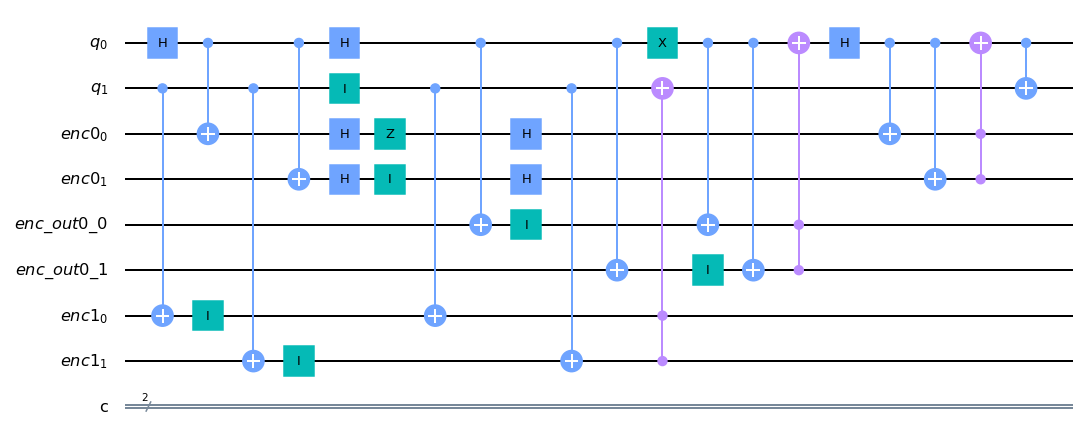

In [304]:
qc.draw('mpl')

# Measurement
Bell basis measurement. However computational basis mesurement can also be done just by commenting the next block of code where cx and h are applied in reverse order.

Comp $\to$ Bell <br>
$|00 \rangle+ |11 \rangle$ $\to$ $ |00 \rangle$ <br>
$|00 \rangle- |11 \rangle$ $\to$ $ |10 \rangle$<br>
$|01 \rangle+ |10 \rangle$ $\to$ $ |01 \rangle$<br>
$|01 \rangle- |10 \rangle$ $\to$ $ |11 \rangle$ <br>

We are expected to get back $\mathbf{|00 \rangle}$ in bell basis for most runs since we do not correct for more than one error gates in each 3 encoding of the respective qubits. (This occurs with low probablity for aprropriate probablities in the random unitary noise section)

In [305]:
########### Finally reversing bell state gen ######
########## Bell basis measurement ########### 

qc.cx(qr[0],qr[1])
qc.h(qr[0])


##### This finally tells us if we have corrected the sign flip error as well

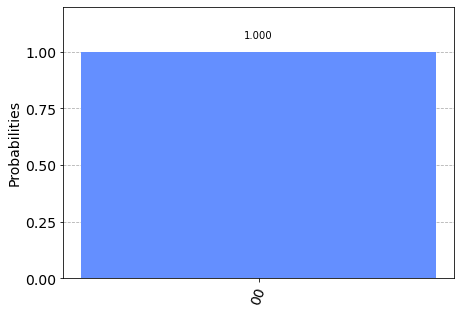

In [306]:


qc.measure(qr,cr)

# qc.measure_all()
qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024

# # Let's see the result
# backend = Aer.get_backend('statevector_simulator')
# final_state = execute(qc,backend).result().get_statevector()


results = execute(qc, backend=qasm_simulator, shots=shots).result()


answer = results.get_counts()
plot_histogram(answer)

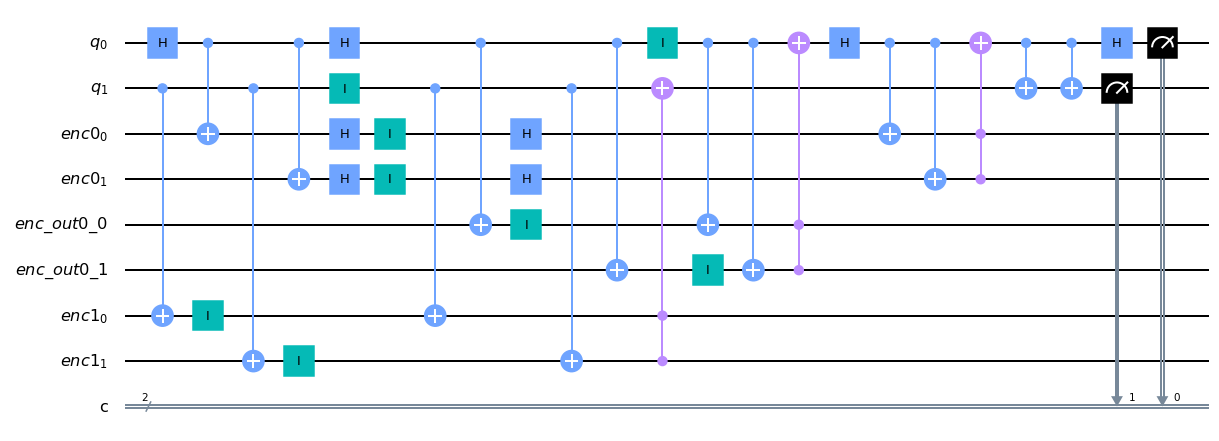

In [298]:
# Example of the entire circuit with bell measurement set up
qc.draw('mpl')

 Sanity checks:
When we have pauli X error in the second qubit, the result without the decoder is $|01 \rangle+|10 \rangle$. However, with the decoder we get back the bell state. <br>

Since H gate gives $|0\rangle+|1\rangle$ state having bit flip gives $|1\rangle+|0\rangle$ which is the same, hence in reality we don't need the bit flip correction for the first qubit.  But since we have a sign flip correction code, bit flip is transformed into phase flip thus needing additional correction code<br>

------------------------------------------------------------------


When we have pauli Z error in the first, the result without the decoder is $|00 \rangle-|11 \rangle$. However, with the decoder we get back the bell state. <br>

Since phase flip acts trivially on the second qubit, we dont need any phase correction.



|      | Qubit 0 | Qubit 1 | 
| ----- | --- | --- |
| <b>Error | Identity | Identity |
|       | Pauli-X | Pauli-X |
|       | Pauli-Z | Pauli-Z |
|       | Pauli-X | Pauli-Z |
|       | Pauli-Z | Pauli-X |
|       | Identity  | Pauli-X |
|       | Identity  | Pauli-Z |
|       |Pauli-X | Identity  | 
|       |Pauli-Z | Identity  | 


|      | Phase Code 0 | Bit Code 1 | 
| ----- | --- | --- |
| <b> Correction |Nothing (Identity) | Nothing (Identity) |
|       | Additional bit flip code| Corrects |
|       | Corrects | Does Nothing |
|       |  Additional bit flip code| Does Nothing |
|       | Corrects | Corrects |
|       | Nothing (Identity)  | Corrects |
|       | Nothing (Identity)  | Does Nothing |
|       |  Additional bit flip code | Nothing (Identity)  | 
|       |Corrects| Nothing (Identity) | 

 Additional bit flip code: We add an bit flip encoder and decoder within the outer phase flip code to make sure the correction happens when there is a bit flip in qubit 0. In total we use 2+2+2=6 encoder qubits